# Loading the data

In [1]:
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
import sklearn

import nltk, re
from nltk.corpus import stopwords

data_dir='./dataset/'

In [2]:
df = pd.read_csv(data_dir+'train.csv')

In [3]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0


In [4]:
print ("The Columns:", df.columns.values)

The Columns: ['id' 'comment_text' 'toxic' 'severe_toxic' 'obscene' 'threat' 'insult'
 'identity_hate']


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
df.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Print Random Comments

In [7]:
target_columns = ['toxic','severe_toxic','obscene','threat','insult','identity_hate']

print ("Some random texts with their labels.\n## Print Random Comments")

np.random.seed(8848)

for i in np.random.randint(0, 100000, 5):
    text = df['comment_text'].values[i]
    labs = df[target_columns].values[i]
    print ("Comment:\n", text[:200]+' ...', "\nLabel:", labs ,"\n\n")

Some random texts with their labels.
## Print Random Comments
Comment:
 Wikipedblack people are stupid ia ... 
Label: [1 0 0 0 0 0] 


Comment:
 "

Welcome!

Hello, , and welcome to Wikipedia!  I hope you like the place and decide to stay. Unfortunately, one or more of the pages you created may not conform to some of Wikipedia's guidelines for ... 
Label: [0 0 0 0 0 0] 


Comment:
 "
I don't think it is pertinent. April 15 is also the anniversary of the Belfast Blitz and many other things, but there is no clear connection between this event and any of that other stuff, including ... 
Label: [0 0 0 0 0 0] 


Comment:
 No problem, however only the UEFA EUROPA LEAGUE trophy and the INTERCONTINETAL trophy works. The CHAMPIONS LEAGUE and the INTERTOTO trophies do not take me to the same page the other two do, which doe ... 
Label: [0 0 0 0 0 0] 


Comment:
 change the title 

this is more than an arrest, this has touch the life of many minorities. Plain and simple. ... 
Label: [0 0 0 0 0 0]

## Data type

In [8]:
for col in target_columns:
    print (col, "\tunique values:", df[col].unique() )## Data shape and distribution

toxic 	unique values: [0 1]
severe_toxic 	unique values: [0 1]
obscene 	unique values: [0 1]
threat 	unique values: [0 1]
insult 	unique values: [0 1]
identity_hate 	unique values: [0 1]


## Data shape and distribution

In [9]:
print (f"df.shape={df.shape}")

df.shape=(159571, 8)


In [10]:
for col in target_columns:
    print (col, df[col].sum())

toxic 15294
severe_toxic 1595
obscene 8449
threat 478
insult 7877
identity_hate 1405


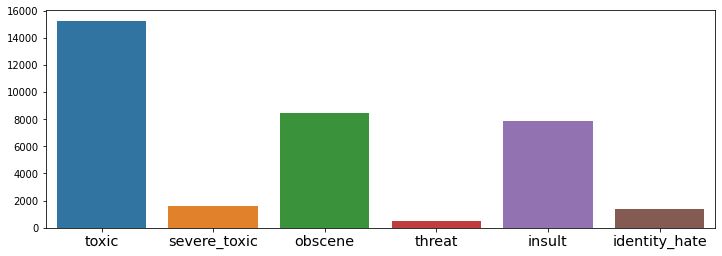

In [11]:
class_sum = [df[col].sum() for col in target_columns]

fig, ax = plt.subplots(1,1, figsize=(12,4))
sns.barplot(x=target_columns, y=class_sum, ax=ax)
ax.set_xticklabels(target_columns, fontsize='x-large');

There appears to be a huge class imbalance. Don't worry too much about it at the moment. Work on some models first and come back to see if we can do something about it.

Let's also check how the label themselves are correlated

In [12]:
corr_matrix = df[target_columns].corr()
corr_matrix 

,toxic,severe_toxic,obscene,threat,insult,identity_hate
toxic,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
severe_toxic,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
obscene,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
insult,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
identity_hate,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


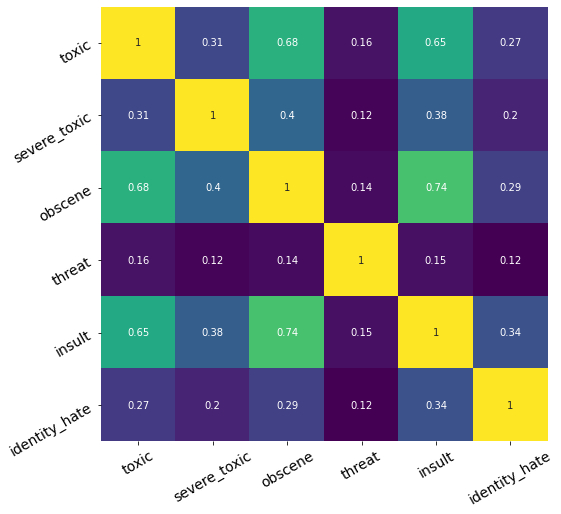

In [13]:
fig, ax = plt.subplots(1,1, figsize=(8,8))
sns.heatmap(corr_matrix, cmap='viridis', annot=True, cbar=False);
ax.tick_params(axis='both', which='major', labelsize=14, rotation=30)


In [14]:
df['label_sum'] = df['toxic']+df['severe_toxic']+df['obscene']+df['threat']+df['insult']+df['identity_hate']

In [15]:
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0


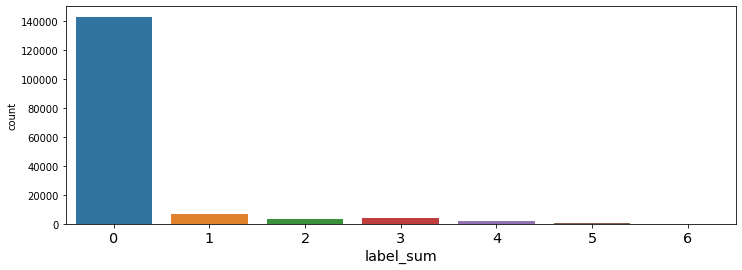

In [16]:
fig, ax = plt.subplots(1,1,figsize=(12,4));
sns.countplot(df['label_sum'], ax=ax);
plt.xticks(fontsize='x-large');
plt.xlabel('label_sum', fontsize='x-large');

In [17]:
non_toxic = df[df['label_sum']==0].shape[0]
non_toxic_frac = 100*non_toxic/df.shape[0]

print (f"Toxic labelled comments fraction = {round(non_toxic_frac, 2)}%")
print (f"Non-toxic labelled comments fraction = {round(100-non_toxic_frac, 2)}%")

Toxic labelled comments fraction = 89.83%
Non-toxic labelled comments fraction = 10.17%


Again a huge imbalance between toxic labelled comments vs non labeled. We may have to use Neural Net for this.

# Word Cloud

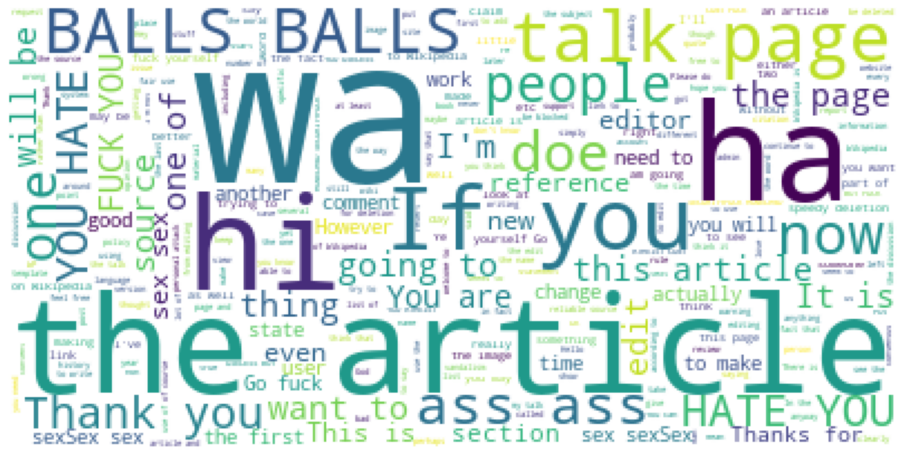

In [18]:
from wordcloud import WordCloud, STOPWORDS

def PlotWordCloud(df, col):
    stopwords_ = set(STOPWORDS)
    wordcloud = WordCloud(background_color='white',
                          max_words=1000,
                          stopwords=stopwords_).generate(" ".join([com for com in df[col]]))

    plt.figure(figsize=(16,10),edgecolor='blue')
    plt.imshow(wordcloud, cmap='plasma')
    plt.axis("off")

PlotWordCloud(df[:10000], 'comment_text')

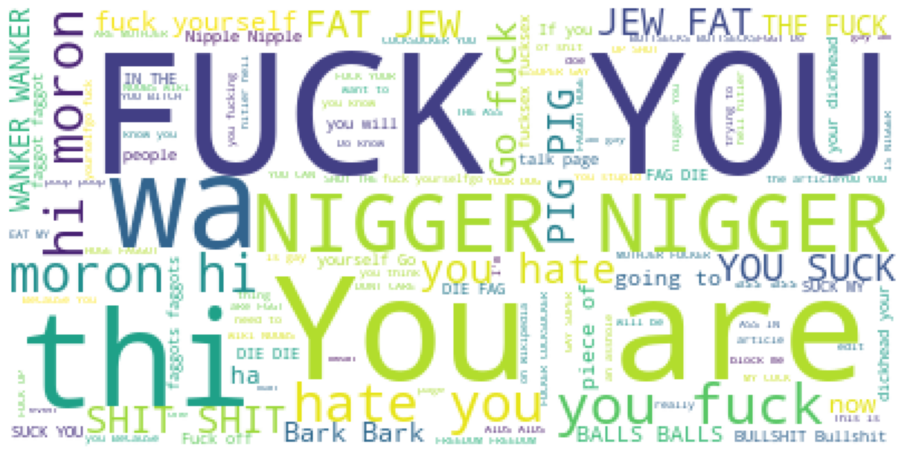

In [19]:
# Let's plot the wordcloud only with toxic comments.
PlotWordCloud(df[df['label_sum']!=0], 'comment_text')

### Most used words in the Toxic comments

In [20]:
df['comment_lower'] = df['comment_text'].apply(lambda x: x.lower())

In [21]:
from collections import Counter
STOPWORDS = set(stopwords.words('english'))
words_in_toxic_coms = [word for com in df[df['label_sum']!=0]['comment_lower'].values for
                       word in com.lower().split() if word not in STOPWORDS ]


Top 10 most common words: [('fuck', 8364), ('like', 3648), ('"', 3590), ('nigger', 3227), ('fucking', 3204), ('suck', 2883), ('go', 2857), ('shit', 2729), ('hate', 2606), ('u', 2548)]


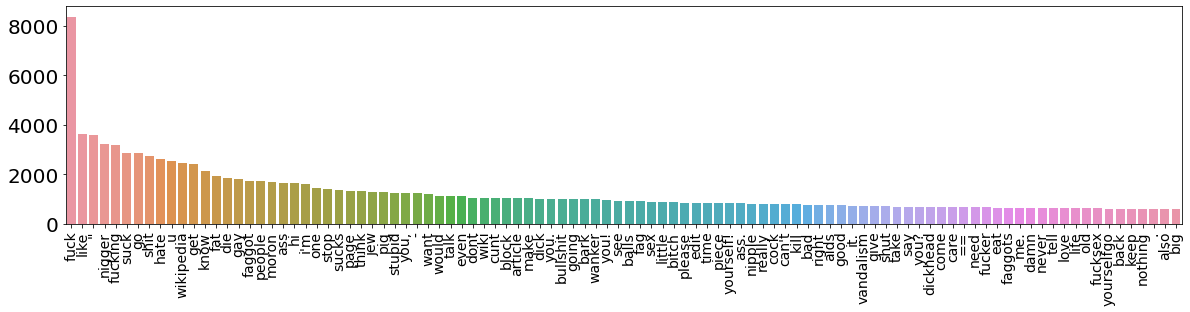

In [22]:
def plot_common_words(words_list, topN=100, ax=None):    
    word_counter=Counter(words_list)
    most_common = word_counter.most_common(topN)
    ks = [kv_pair[0] for kv_pair in most_common]
    vs = [kv_pair[1] for kv_pair in most_common]

    print ("Top 10 most common words:", most_common[:10] )
    
    if ax is None:
        fig, ax = plt.subplots(1,1,figsize=(20,4));
    
    sns.barplot(x=ks, y=vs, ax=ax);
    ax.tick_params(axis='x', which='major', labelsize=14, rotation=90)
    ax.tick_params(axis='y', which='major', labelsize=20)
    
plot_common_words(words_in_toxic_coms)

There are quiet a lot of repetition of words like 'F\*\*k' and 'F\*\*king'. So, let's stemmize the words.

Top 10 most common words: [('fuck', 11755), ('suck', 4376), ('go', 3864), ('like', 3833), ('"', 3590), ('nigger', 3337), ('get', 2800), ('shit', 2752), ('hate', 2720), ('u', 2548)]


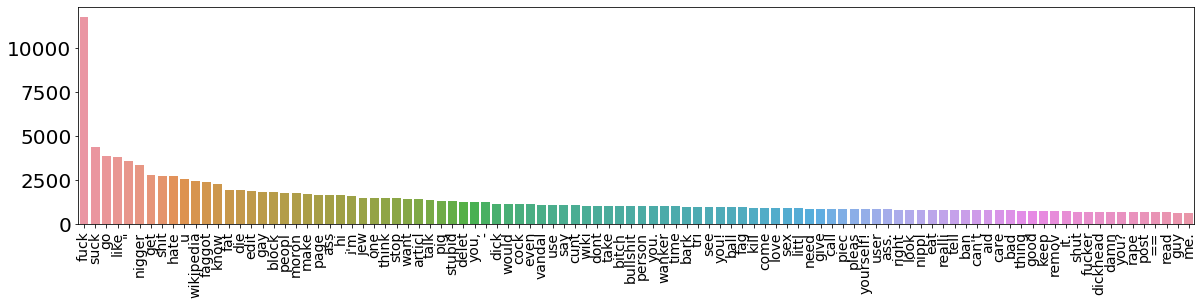

In [23]:
from nltk.stem.porter import PorterStemmer

p_stemmer = PorterStemmer()
words_in_toxic_coms_stem = [p_stemmer.stem(word) for com in df[df['label_sum']!=0]['comment_lower'].values for word in com.lower().split() if word not in STOPWORDS ]
plot_common_words(words_in_toxic_coms_stem)

Top 10 most common words: [('fuck', 8364), ('like', 3648), ('"', 3590), ('nigger', 3227), ('fucking', 3204), ('suck', 2883), ('go', 2857), ('shit', 2729), ('hate', 2606), ('u', 2548)]
Top 10 most common words: [('fuck', 11755), ('suck', 4376), ('go', 3864), ('like', 3833), ('"', 3590), ('nigger', 3337), ('get', 2800), ('shit', 2752), ('hate', 2720), ('u', 2548)]


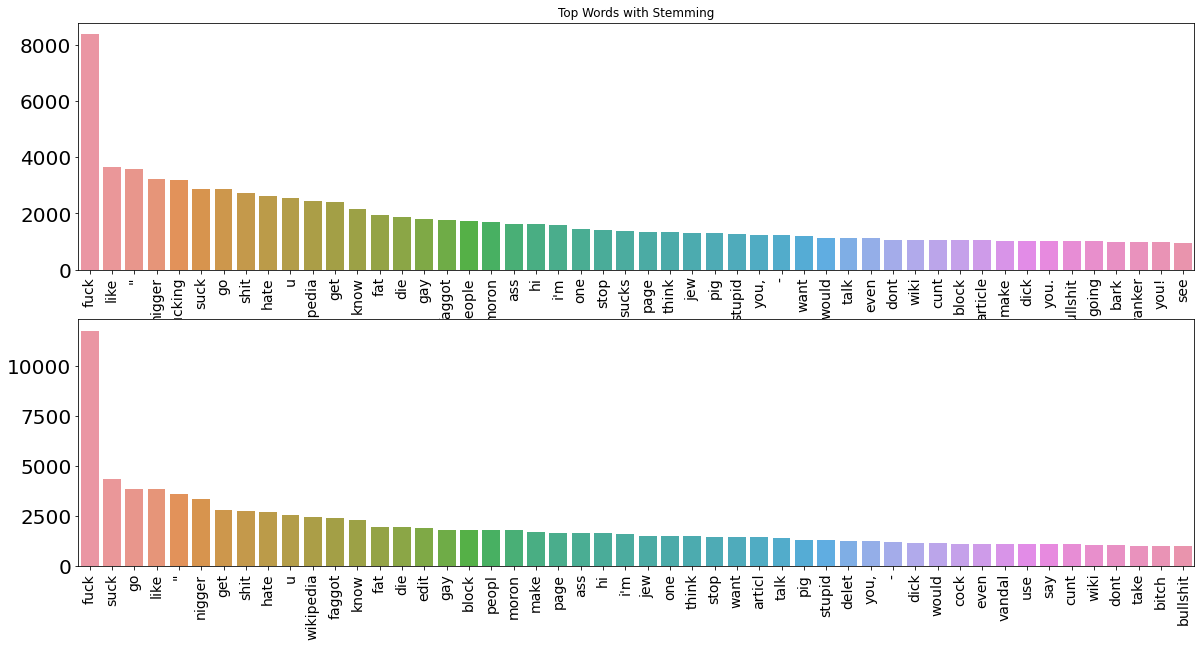

In [24]:

fig, ax = plt.subplots(2,1,figsize=(20,10));
ax[0].set_title("Top Words without Stemming", fontsize=20)
plot_common_words(words_in_toxic_coms, topN=50, ax=ax[0])

ax[0].set_title("Top Words with Stemming")
plot_common_words(words_in_toxic_coms_stem, topN=50, ax=ax[1])

## Text Processing
* Find \n and apostrophe in the comments. things like aren't isn't and so on.

In [25]:
com = "explanation edits aren't made username hardcore metal"
f = lambda x : int("'" in x)  # x is a comment
f(com)

1

In [26]:
df["has_apostrophe"] = df['comment_lower'].apply(lambda x : int("'" in x))
df["has_new_line"]   = df['comment_lower'].apply(lambda x : int("\n" in x))
df.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0


In [27]:
df[df["has_new_line"]==1].shape

(94466, 12)

In [28]:
df[df["has_apostrophe"]==1 ].shape

(77248, 12)

In [29]:
df.shape

(159571, 12)

- so there are a lot of comments with apostrophe (77248/159571)  as well as with new_line (94466/159571)
- Replace \n with a space.
- Look at the apostrophe little carefully.

In [30]:
df_with_apos = df[df["has_apostrophe"]==1]

In [31]:
df_with_apos.shape

(77248, 12)

In [32]:
df_with_apos.head(2)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0


In [33]:
com = "explanation edits aren't Aren't aren'T made username hardcore metal"
get_apos_tokens = lambda com: re.findall("[A-Z,a-z]*\'[a-z, A-Z]", com)
print ( com, '\n', get_apos_tokens(com) )

explanation edits aren't Aren't aren'T made username hardcore metal 
 ["aren't", "Aren't", "aren'T"]


In [34]:
com = df_with_apos['comment_lower'].values[12]
print ( com, '\n', get_apos_tokens(com) )

the mitsurugi point made no sense - why not argue to include hindi on ryo sakazaki's page to include more information? 
 ["sakazaki's"]


In [35]:
df_with_apos['tokens_with_apos'] = df_with_apos['comment_lower'].apply(get_apos_tokens)

<ipython-input-35-a1e21108aae5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_apos['tokens_with_apos'] = df_with_apos['comment_lower'].apply(get_apos_tokens)


In [36]:
df_with_apos.head(5)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line,tokens_with_apos
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1,"[weren't, don't, i'm]"
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0,"[d'a, i'm]"
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...",1,0,"[i'm, it's]"
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ...",1,1,"[can't, it's]"
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...",1,0,[that's]


In [37]:
words_with_apos = list(set([w for tokens in df_with_apos['tokens_with_apos'] for w in tokens]))
words_with_is_am_are_not_have = list(set([w for tokens in df_with_apos['tokens_with_apos'] for w in tokens if ("n't" in w) or ("'s" in w) or ("'m" in w) or ("'r" in w) or ("'re" in w) or ("'v" in w) or ("'ve" in w)]))


In [38]:
len(words_with_apos), len(words_with_is_am_are_not_have)

(14979, 9099)

In [39]:
words_others = [w for w in words_with_apos if w not in words_with_is_am_are_not_have]

In [40]:
#words_others

## TODO for word processing

- replace n't with not, 's with " is" with a space, 'r and 're with are
- 'v and 've with have
- since all these words are in the stopwords so basically remove the part after '


In [41]:
com = "explanation edits \nabcd aren't it's they'v they've Aren't aren'T made $900 for some"
com = com.lower()
#re.sub("[a-z]*\'t", "", com)
#com = re.sub("[a-z]*\'[r,v]e", "", com) # r
#com = re.sub("[a-z]*\'[s,t,r,v]", "", com)

#com = re.sub("[^a-zA-Z]", " ", com)

com = re.sub("\\n", " ", com)


com


"explanation edits  abcd aren't it's they'v they've aren't aren't made $900 for some"

In [42]:
'they' in STOPWORDS

True

## Text preprocessing

In [43]:
def prepare_text(text):
    text = text.lower()
    text = re.sub("\\n", " ", text)  # replace \n with space
    text = re.sub("[a-z]*\'[r,v]e", "", text) # replace 've, 're
    text = re.sub("[a-z]*\'[r,v]e", "", text) # replace 've, 're
    text = re.sub("[a-z]*\'[s,t,r,v]", "", text) # replace 's, 't, 'r, 'v
    text = re.sub("[^a-zA-Z]", " ", text)   # Replace everything not a letter with a space        
    text = ' '.join([word for word in text.split() if word not in STOPWORDS]) # delete stopwors from text
    return text


In [44]:
df['com_processed'] = df['comment_text'].apply(prepare_text)
df.head(3)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line,com_processed
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...",1,0,hey man really trying edit war guy constantly ...


In [45]:
# There are a few comments which became of 0 length after processing the text
# get rid of them
df=df[df['com_processed']!='']
df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,label_sum,comment_lower,has_apostrophe,has_new_line,com_processed
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,explanation\nwhy the edits made under my usern...,1,1,explanation edits made username hardcore metal...
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,d'aww! he matches this background colour i'm s...,1,0,aww matches background colour seemingly stuck ...
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,"hey man, i'm really not trying to edit war. it...",1,0,hey man really trying edit war guy constantly ...
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,"""\nmore\ni can't make any real suggestions on ...",1,1,make real suggestions improvement wondered sec...
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,"you, sir, are my hero. any chance you remember...",1,0,sir hero chance remember page


In [46]:
df.to_csv(data_dir+"df_processed.csv", index=False)